<a href="https://colab.research.google.com/github/YanouY/590-assignment/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
from keras import layers
import keras
import pandas as pd
from itertools import chain
from tensorflow.keras.models import Sequential

tfkl = tfk.layers

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
file1 = '/content/data_batch_1'
file2 = '/content/data_batch_2'
file3 = '/content/data_batch_3'
file4 = '/content/data_batch_4'
file5 = '/content/data_batch_5'
batch_1 = unpickle(file1)
batch_2 = unpickle(file2)
batch_3 = unpickle(file3)
batch_4 = unpickle(file4)
batch_5 = unpickle(file5)
test = '/content/test_batch'
test_ = unpickle(test)

In [ ]:
data_1 = batch_1[b'data']
label_1 = batch_1[b'labels']
data_2 = batch_2[b'data']
label_2 = batch_2[b'labels']
data_3 = batch_3[b'data']
label_3 = batch_3[b'labels']
data_4 = batch_4[b'data']
label_4 = batch_4[b'labels']
data_5 = batch_5[b'data']
label_5 = batch_5[b'labels']
test_data = test_[b'data']
test_label = test_[b'labels']

In [ ]:
data = np.array([*data_1, *data_2, *data_3, *data_4, *data_5])
label = np.array([*label_1, *label_2, *label_3, *label_4, *label_5])

In [ ]:
input_img = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) # 32, 32, 16
x = layers.MaxPooling2D((2, 2), padding='same')(x) # 16, 16, 16
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x) # 8, 8, 8
x = layers.MaxPooling2D((2, 2), padding='same')(x) # 8, 8, 8
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x) # 4, 4, 8
encoded = layers.MaxPooling2D((2, 2), padding='same')(x) # 4, 4, 8

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded) # 4 4 8
x = layers.UpSampling2D((2, 2))(x) # 8 8 8 
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x) # 8 8 8
x = layers.UpSampling2D((2, 2))(x) # 16 16 8
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) # 14 14 16
x = layers.UpSampling2D((2, 2))(x) # 28 28 16
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x) # 28 28 3

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)          

In [ ]:
from keras.callbacks import TensorBoard
autoencoder._get_distribution_strategy = lambda: None

data = data.astype('float32') / 255
test_data = test_data.astype('float32') / 255
x_train = np.reshape(data, (len(data), 32, 32, 3))
test_data = np.reshape(test_data, (len(test_data), 32, 32, 3))
#x_label = np.reshape(label, (len(label), 32, 32, 3))

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(test_data, test_data))

Epoch 1/10
391/391 [==============================] - 83s 212ms/step - loss: 0.6423 - val_loss: 0.6252
Epoch 2/10
391/391 [==============================] - 83s 213ms/step - loss: 0.6213 - val_loss: 0.6194
Epoch 3/10
391/391 [==============================] - 84s 214ms/step - loss: 0.6173 - val_loss: 0.6169
Epoch 4/10
391/391 [==============================] - 84s 214ms/step - loss: 0.6153 - val_loss: 0.6153
Epoch 5/10
391/391 [==============================] - 85s 216ms/step - loss: 0.6139 - val_loss: 0.6139
Epoch 6/10
391/391 [==============================] - 84s 214ms/step - loss: 0.6128 - val_loss: 0.6129
Epoch 7/10
391/391 [==============================] - 84s 215ms/step - loss: 0.6118 - val_loss: 0.6122
Epoch 8/10
391/391 [==============================] - 84s 215ms/step - loss: 0.6108 - val_loss: 0.6112
Epoch 9/10
391/391 [==============================] - 84s 214ms/step - loss: 0.6099 - val_loss: 0.6102
Epoch 10/10
391/391 [==============================] - 84s 214ms/step - l

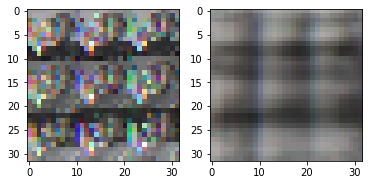

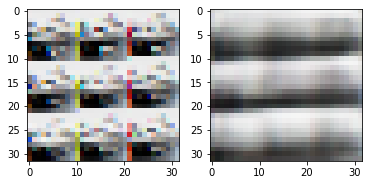

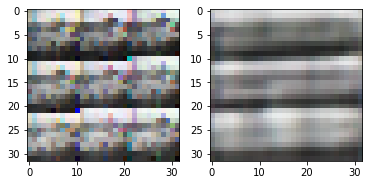

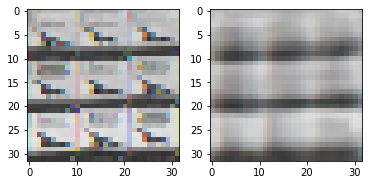

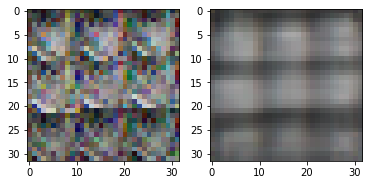

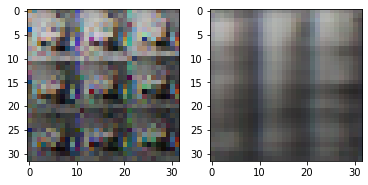

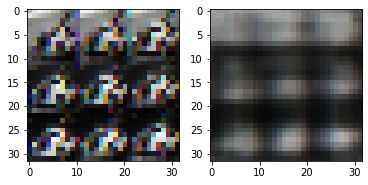

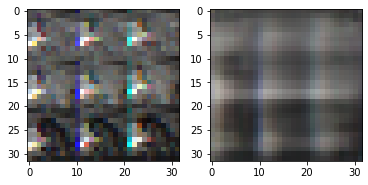

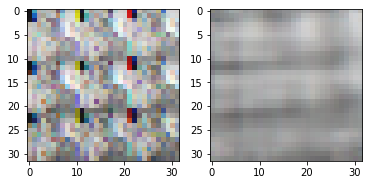

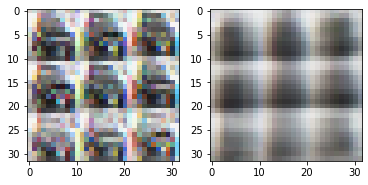

In [ ]:
result = autoencoder.predict(test_data)

for i in range(10):
    plt.subplot(1, 2, 1)
    plt.imshow(test_data[i].squeeze(), cmap='bone')
    plt.subplot(1, 2, 2, )
    plt.imshow(result[i].squeeze(), cmap='bone')
    plt.show()

### 2.1 Deep CNN

In [ ]:
model = tfk.Sequential()
# block1
model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='sigmoid', input_shape=(32, 32, 3)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))


# block2
model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))

# block3
model.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))

# flatten
model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Dense(10, activation = 'softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 16, 16, 32)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 16)          2064      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 8)           5

In [ ]:
label = tf.one_hot(label.astype('int32'), depth = 10)
test_label = np.array(test_label)
test_label = np.reshape(test_label, (len(test_label), ))
test_label = tf.one_hot(test_label.astype('int32'), depth = 10)

In [ ]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(x_train, label, batch_size = 35,  epochs=5, validation_data=(test_data, test_label))

Epoch 1/5
1429/1429 [==============================] - 16s 11ms/step - loss: 2.3043 - val_loss: 2.3027
Epoch 2/5
1429/1429 [==============================] - 16s 11ms/step - loss: 2.2966 - val_loss: 2.2747
Epoch 3/5
1429/1429 [==============================] - 15s 10ms/step - loss: 2.2448 - val_loss: 2.2193
Epoch 4/5
1429/1429 [==============================] - 15s 10ms/step - loss: 2.1833 - val_loss: 2.1161
Epoch 5/5
1429/1429 [==============================] - 15s 10ms/step - loss: 2.1269 - val_loss: 2.0878


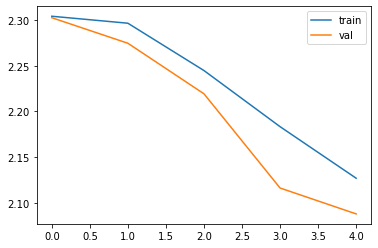

In [ ]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

### 2.2 Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

model1 = tf.keras.models.Sequential()

model1.add(conv_base)
model1.add(tf.keras.layers.GlobalMaxPooling2D())
model1.add(tf.keras.layers.Dense(128,activation='relu'))

model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10,activation='softmax'))

model1.summary()

model1.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model1.fit(x_train, label, batch_size = 35,  epochs=1, validation_data=(test_data, test_label))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________
1429/1429 [==============================] - 4061s 3s/step - loss: 4.0920 - val_loss: 2.3026


### 3.1 RNN

In [17]:
txt = pd.read_csv('/content/SPAM_detection.csv')

In [18]:
txt.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
text = ' '.join(list(txt['Message']))

chars = (sorted(list(set(text))))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print('total chars:', len(chars))

total chars: 118


In [20]:
maxlen = 40
step = 3
sub_sequences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sub_sequences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sub_sequences))

nb sequences: 151116


In [21]:
X = np.zeros((len(sub_sequences), maxlen, len(chars)), dtype=np.uint8 )
Y = np.zeros((len(sub_sequences), len(chars)), dtype=np.uint8)
for i, seq in enumerate(sub_sequences):
    for t, char in enumerate(seq):
        X[i, t, char_indices[char]] = 1
        Y[i, char_indices[next_chars[i]]] = 1

In [ ]:
char_rnn = Sequential()
char_rnn.add(tfkl.LSTM(128, input_shape=(maxlen, len(chars))))
char_rnn.add(tfkl.Dense(len(chars),activation="softmax"))

char_rnn.compile(loss='categorical_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01))

result = char_rnn.fit(X,Y, epochs=20, batch_size=1024)

Epoch 1/20
148/148 [==============================] - 91s 615ms/step - loss: 2.9185
Epoch 2/20
148/148 [==============================] - 92s 619ms/step - loss: 2.3142
Epoch 3/20
148/148 [==============================] - 90s 608ms/step - loss: 2.1063
Epoch 4/20
148/148 [==============================] - 89s 604ms/step - loss: 1.9698
Epoch 5/20
148/148 [==============================] - 91s 612ms/step - loss: 1.8736
Epoch 6/20
148/148 [==============================] - 90s 605ms/step - loss: 1.7982
Epoch 7/20
148/148 [==============================] - 90s 610ms/step - loss: 1.7366
Epoch 8/20
148/148 [==============================] - 89s 604ms/step - loss: 1.6833
Epoch 9/20
148/148 [==============================] - 90s 608ms/step - loss: 1.6389
Epoch 10/20
148/148 [==============================] - 90s 609ms/step - loss: 1.6003
Epoch 11/20
148/148 [==============================] - 90s 606ms/step - loss: 1.5692
Epoch 12/20
148/148 [==============================] - 91s 617ms/step - lo

### 3.2 CNN


reference:  https://www.kaggle.com/bmmidei/using-convolution-for-nlp-text-classification

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from keras.callbacks import Callback
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Embedding, Dropout
from keras.layers import Conv1D, MaxPool1D, Flatten, Concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model

%load_ext autoreload
%autoreload 2

In [71]:
embed_size = 300
max_words = 45000
maxlen = 100 # 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(list(text))
X_train = tokenizer.texts_to_sequences(text)
#X_val = tokenizer.texts_to_sequences(X_val)
word_index = tokenizer.word_index
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = txt['category_val'].values

In [77]:
X_val = np.array(X_val)
X_val = np.reshape(X_val, (len(X_val), 1))
X_val.shape

(5572, 1)

In [78]:
train = np.reshape(X_train, (len(X_train), 10, 5, 2))

In [80]:
X_train, X_val, y_train, y_val = train_test_split(train[:5572], X_val, test_size=0.2, random_state=0)

In [86]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(10, 5, 2)))
model.add(tfkl.MaxPool2D(pool_size=(2,2)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(1, activation='softmax'))

model.summary()

model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(X_train, y_train, steps_per_epoch=20, epochs=20, validation_data=(X_val, y_val))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 8, 3, 1)           19        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 1, 1)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
20/20 [=========================